### generate nucleotide diversity (pi) figure

In [20]:
%run setup.ipynb
populations = phase2_ar1.pop_ids
pop_colours = phase2_ar1.pop_colors
pop_labels = phase2_ar1.pop_labels

In [9]:
winsize = '20000'
chrom = '3R'
start = 1000000
stop = 37000000
pi_fn = '../../../kwiat/vector/ag1000g/release/phase2.AR1/extras/diversity/pi.windows_eqaccess.h5'
pi = h5py.File(pi_fn, 'r')

In [11]:
#make boolean to compress to accessible region
pia = pi[winsize][chrom]['AOcol']['windows'][:]
geoff = (pia[:,0] > start) & (pia[:,1] < stop)
pia.shape, geoff.shape

((1621, 2), (1621,))

In [15]:
#make dict of acc region pi to boxplot
diversity = dict()

for pop in populations:
    pi_all = pi[winsize][chrom][pop]['pi'][:]
    diversity[pop] = pi_all.compress(geoff, axis=0)

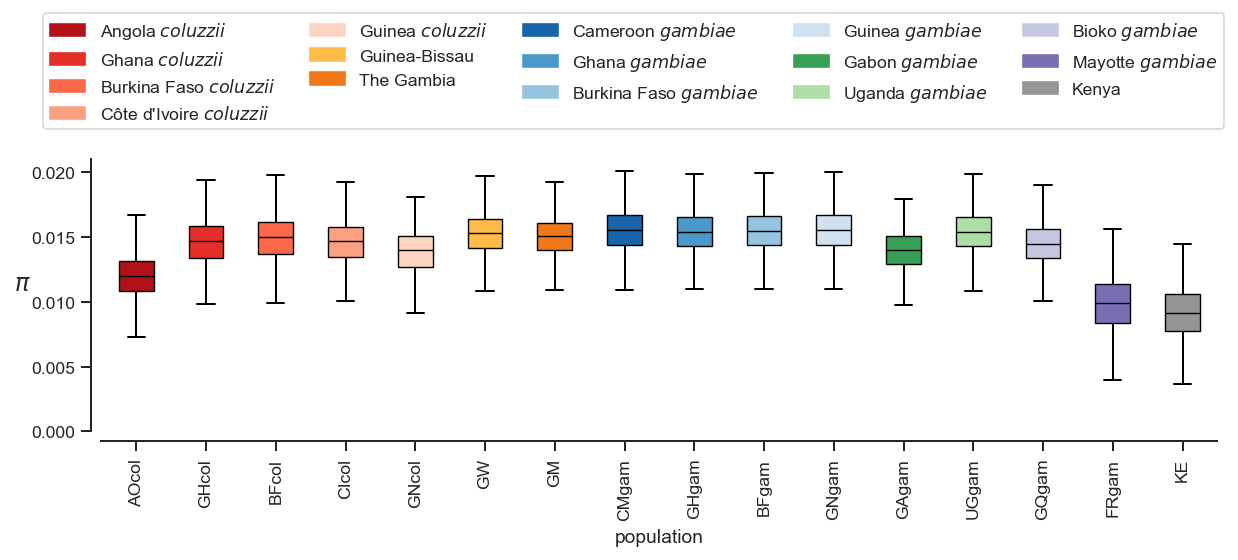

In [37]:
#plot

# Create a figure instance
fig = plt.figure(1, figsize=(10, 2.5))

# Create an axes instance
ax = fig.add_subplot(111)
sns.despine(ax=ax, offset=5)
# Create the boxplot
lw=0.7
bp = ax.boxplot(x=[diversity[pop] for pop in populations],
        labels=populations,  patch_artist=True, 
        medianprops={"color":"k", "linewidth":lw},
        whiskerprops={"color":"k"}, 
        capprops={"color":"k"},
        showfliers=False,
        flierprops={"c":"k", "markersize":0.7})

for p in populations:
    plt.xticks(rotation='vertical')

plt.ylabel(r'$\pi$', rotation = 0, fontsize=12)
plt.xlabel('population', va='top')
plt.ylim(0,0.021)

for patch, color in zip(bp['boxes'], [pop_colours[pop] for pop in populations]):
    patch.set_color('k')
    patch.set_facecolor(color)
    patch.set_linewidth(lw)


handles = [mpl.patches.Patch(color=pop_colours[pop], label=pop_labels[pop]) for pop in populations]
plt.legend(handles=handles, loc='lower left', bbox_to_anchor=(-0.06, 1.08), ncol=5);
fn = '../artwork/pi.jpeg'
fig.savefig(fn, jpeg_quality=100, dpi=100, bbox_inches='tight')